In [ ]:
pip install pymupdf pillow -q

In [1]:
from PIL import Image, ImageDraw
import fitz

In [2]:
document = fitz.open("./data/1706.03762v7.pdf")

In [3]:
document.page_count

15

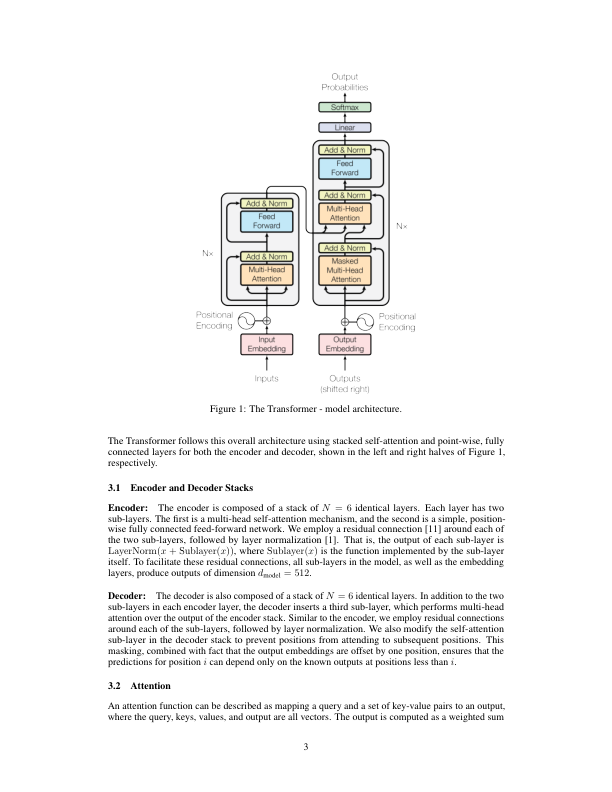

In [4]:
pix = document[2].get_pixmap()
Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

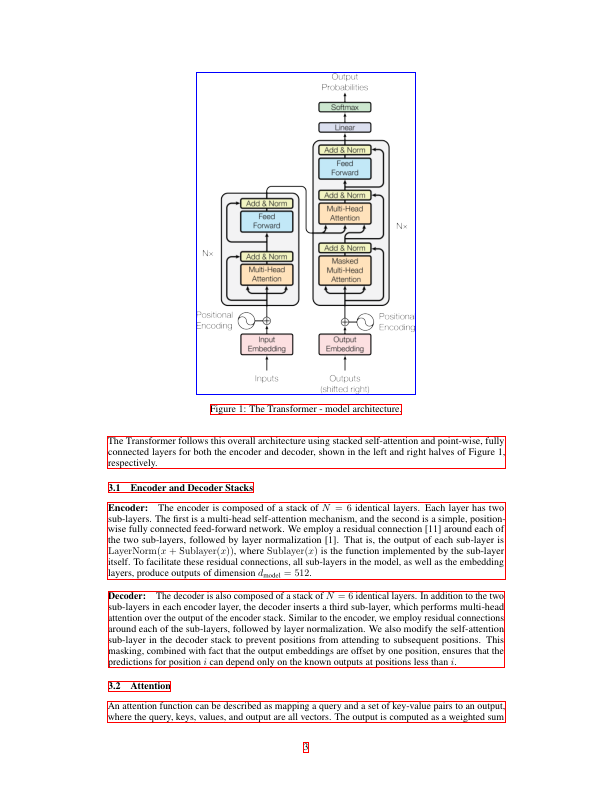

In [5]:
page = document[2]  # page 불러오기기
pix = page.get_pixmap()

image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
draw = ImageDraw.Draw(image)

# Image Bounding Box
image_list = page.get_images(full=True)
for image_info in image_list:
    xref = image_info[0] # 이미지 XREF 번호
    bbox = tuple(page.get_image_bbox(image_info)) # 이미지 바운딩 박스 좌표 (l, t, r, b)
    draw.rectangle(bbox, outline="blue", width=1)

# Text Bounding Box
blocks = page.get_text("blocks")
for block in blocks:
    x0, y0, x1, y1, content, block_no, block_type = block[:7]
    bbox = (x0, y0, x1, y1)  # (l, t, r, b)
    if block_type == 0:
        draw.rectangle(bbox, outline="red")


image